In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D

C:\Users\srini\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\srini\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\srini\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [2]:
train_path = 'RGB_224/train'
test_path = 'RGB_224/test'
val_path = 'RGB_224/val'

In [3]:
img_width = 128
img_height = 128

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 27639 files belonging to 139 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False)

Found 6627 files belonging to 139 classes.


In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    val_path,
    shuffle = False,
    image_size = (img_height, img_width),
    batch_size = 32,
    validation_split = False
)

Found 6422 files belonging to 139 classes.


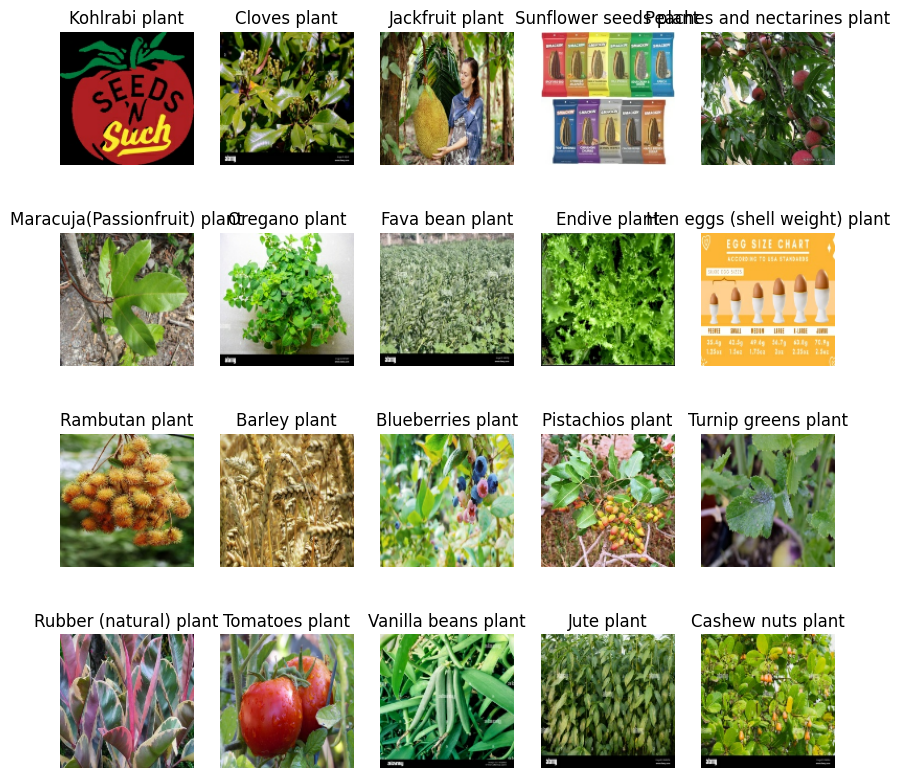

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizantal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [11]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(120, activation = 'relu'),
    layers.Dense(len(data_cat),activation = 'softmax')
    
])

In [12]:
model.compile(optimizer='Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [14]:
import zipfile
from tensorflow.keras.models import load_model

model.save("best_model.keras")

with zipfile.ZipFile("best_model.zip", 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write("best_model.keras")

C:\Users\srini\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [16]:
history = model.fit(data_train, validation_data=data_val,epochs=10,batch_size=32,callbacks=callbacks)

Epoch 1/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 185s 214ms/step - accuracy: 0.0295 - loss: 4.7270 - val_accuracy: 0.0614 - val_loss: 4.4620
Epoch 2/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 141s 164ms/step - accuracy: 0.0682 - loss: 4.3793 - val_accuracy: 0.0853 - val_loss: 4.2784
Epoch 3/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 142s 165ms/step - accuracy: 0.0935 - loss: 4.1978 - val_accuracy: 0.1109 - val_loss: 4.1043
Epoch 4/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 143s 166ms/step - accuracy: 0.1125 - loss: 4.0716 - val_accuracy: 0.1227 - val_loss: 4.0808
Epoch 5/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 145s 167ms/step - accuracy: 0.1268 - loss: 3.9784 - val_accuracy: 0.1320 - val_loss: 3.9871
Epoch 6/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 144s 167ms/step - accuracy: 0.1422 - loss: 3.9038 - val_accuracy: 0.1403 - val_loss: 3.9619
Epoch 7/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 145s 168ms/step - accuracy: 0.1517 - loss: 3.8311 - val_accuracy: 0.1540 - val_loss: 3.9107
Epoch 8/10
864/864 ━━━━━━━━━━━━━━━━━━━━ 155s 179ms/step - accuracy: 0.1639 -

Text(0.5, 1.0, 'Accuracy')

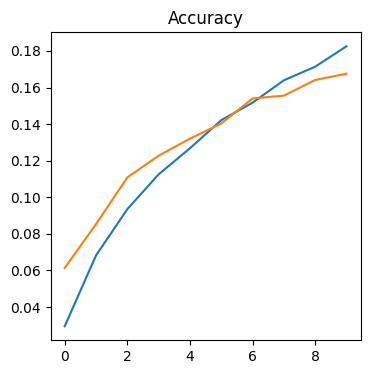

In [17]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

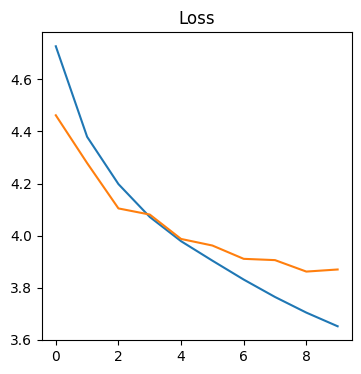

In [18]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.title('Loss')

In [20]:
image = 'figure_1_fmt.png'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [21]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


In [22]:
score=tf.nn.softmax(predict)

In [23]:
print('Image is {}'.format(data_cat[np.argmax(score)]))
print('Accuracy: {:.2f}%'.format(np.max(score)*100))

Image is Bananas plant
Accuracy: 0.81%


In [24]:
data_cat

['Aji pepper plant',
 'Almonds plant',
 'Amaranth plant',
 'Apples plant',
 'Artichoke plant',
 'Avocados plant',
 'Bananas plant',
 'Barley plant',
 'Beets plant',
 'Black pepper plant',
 'Blueberries plant',
 'Bok choy plant',
 'Brazil nuts plant',
 'Broccoli plant',
 'Brussels sprout plant',
 'Buckwheat plant',
 'Cabbages and other brassicas plant',
 'Camucamu plant',
 'Carrots and turnips plant',
 'Cashew nuts plant',
 'Cassava plant',
 'Cauliflower plant',
 'Celery plant',
 'Cherimoya plant',
 'Cherry plant',
 'Chestnuts plant',
 'Chickpeas plant',
 'Chili peppers and green peppers plant',
 'Cinnamon plant',
 'Cloves plant',
 'Cocoa beans plant',
 'Coconuts plant',
 'Coffee (green) plant',
 'Collards plant',
 'Cotton lint plant',
 'Cranberries plant',
 'Cucumbers and gherkins plant',
 'Dates plant',
 'Dry beans plant',
 'Dry peas plant',
 'Durian plant',
 'Eggplants (Aubergines) plant',
 'Endive plant',
 'Fava bean plant',
 'Figs plant',
 'Flax fiber and tow plant',
 'Flaxseed (Li

In [25]:
model.save("image_classifier.keras")